In [1]:
from scipy.stats import median_abs_deviation

import sys
sys.path.insert(0, '/home/workspace/mm_analysis')
sys.path.insert(0, '/home/workspace/')

from py_util import *
from utilities import *

hdir = '/home/workspace'
wdir = hdir + "/mm_analysis/EXP-01244"
objdir = wdir + "/quality_control/objects/"

bm_adata = sc.read_h5ad(objdir + "bm_qc_adata.h5ad")
msc_adata = sc.read_h5ad(objdir + "msc_qc_adata.h5ad")
week2_adata = sc.read_h5ad(objdir + "week2_qc_adata.h5ad")
week3_adata = sc.read_h5ad(objdir + "week3_qc_adata.h5ad")
week4_adata = sc.read_h5ad(objdir + "week4_qc_adata.h5ad")

adatas = [bm_adata, msc_adata, week2_adata, week3_adata, week4_adata]

adata = ad.concat(adatas, join='inner', merge='same')

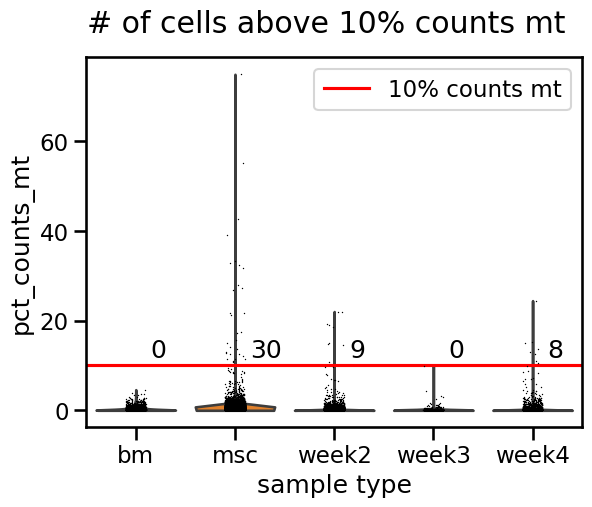

In [68]:
fig, ax = plt.subplots(1, 1)

metric = 'pct_counts_mt'

sc.pl.violin(
    adata,
    keys=metric,
    groupby='sample_type',
    show=False,
    ax=ax
)

samples = list(adata.obs['sample_type'].unique())

for i, sample in enumerate(samples):
    mask = adata.obs['sample_type'] == sample
    num = sum(adata[mask].obs[metric] >= 10)
    
    ax.text(i + 0.15, 16, f'{num}', ha='left', va='top')

ax.axhline(10, xmin=0, xmax=5, color='red', label='10% counts mt')

fig.suptitle('# of cells above 10% counts mt')

ax.legend()

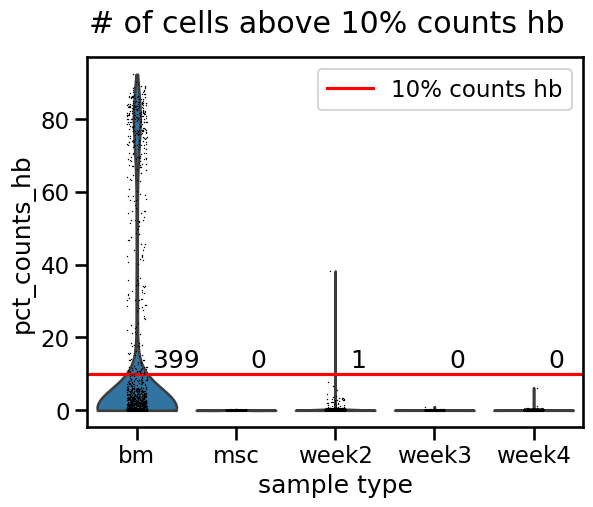

In [67]:
fig, ax = plt.subplots(1, 1)

metric = 'pct_counts_hb'

sc.pl.violin(
    adata,
    keys=metric,
    groupby='sample_type',
    show=False,
    ax=ax
)

samples = list(adata.obs['sample_type'].unique())

for i, sample in enumerate(samples):
    mask = adata.obs['sample_type'] == sample
    num = sum(adata[mask].obs[metric] >= 10)
    
    ax.text(i + 0.15, 17, f'{num}', ha='left', va='top')

ax.axhline(10, xmin=0, xmax=5, color='red', label='10% counts hb')

fig.suptitle('# of cells above 10% counts hb')

ax.legend()

In [31]:
adata

AnnData object with n_obs × n_vars = 49435 × 18082
    obs: 'sample', 'base_sample', 'sample_type', 'name', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier', 'doublet_score', 'predicted_doublet', 'leiden_0_0', 'leiden_0_1', 'leiden_0_2', 'leiden_0_3', 'leiden_0_4', 'leiden_0_5', 'leiden_0_6', 'leiden_0_7', 'leiden_0_8', 'leiden_0_9', 'leiden_1_0', 'leiden_1_1', 'leiden_1_2', 'leiden_1_3', 'leiden_1_4', 'leiden_1_5', 'leiden_1_6', 'leiden_1_7', 'leiden_1_8', 'leiden_1_9', 'leiden_2_0', 'leiden_2_1'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'ribo', 'hb'
    uns: 'sample_type_colors'
    obsm: 'X_pca', 'X_umap'

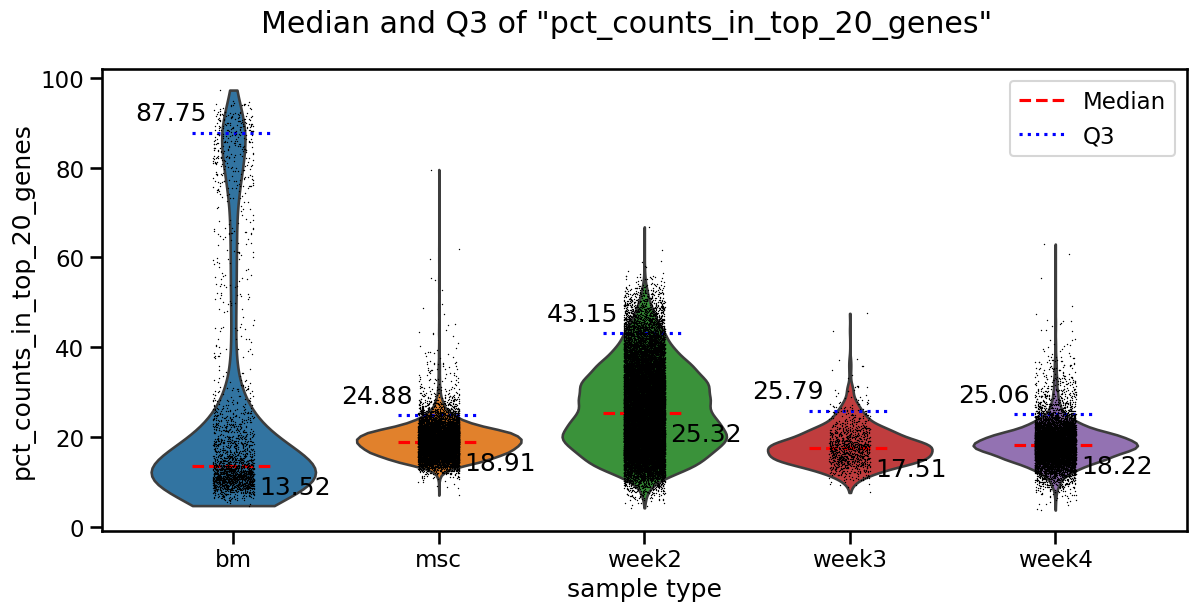

In [66]:
fig, ax = plt.subplots(1, 1, figsize=(14, 6))

metric = 'pct_counts_in_top_20_genes'

sc.pl.violin(
    adata,
    keys=metric,
    groupby='sample_type',
    show=False,
    ax=ax
)

samples = list(adata.obs['sample_type'].unique())

for i, sample in enumerate(samples):
    mask = adata.obs['sample_type'] == sample
    data = adata[mask].obs['pct_counts_in_top_20_genes']
    median = np.median(data)
    q3 = np.quantile(data, 0.95)
    
    ax.text(i + 0.125, median - 2, f'{median:.2f}', ha='left', va='top')
    ax.text(i - 0.475, q3 + 7, f'{q3:.2f}', ha='left', va='top')
    
    ax.hlines(median, xmin=i-0.2, xmax=i+0.2, color='red', linestyle='--', label='Median' if i == 0 else '')
    ax.hlines(q3, xmin=i-0.2, xmax=i+0.2, color='blue', linestyle=':', label='Q3' if i == 0 else '')

fig.suptitle('Median and Q3 of "pct_counts_in_top_20_genes"')

ax.legend()